## Import Libraries and Data

Import the required libraries and setting globals

In [1]:
import pandas as pd
import sklearn as sl
import numpy as np

TEST_DATA_FILE_NAME = 'test.csv'
TRAIN_DATA_FILE_NAME = 'train.csv'

Importing the data

In [2]:
train_data = pd.read_csv(TRAIN_DATA_FILE_NAME)
test_data = pd.read_csv(TEST_DATA_FILE_NAME)

## Describe Data

First look at our data set, features and make decisions about the tools we are going to use

#### What are the features in dataset?

In [3]:
print(train_data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


https://www.kaggle.com/c/titanic/data

* Survived - Survival	(0 = No, 1 = Yes)
* Pclass - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* Name - Name
* Sex - Sex	
* Age - Age in years	
* Sibsp - # of siblings / spouses aboard the Titanic	
* Parch - # of parents / children aboard the Titanic	
* Ticket - Ticket number	
* Fare - Passenger fare	
* Cabin - Cabin number	
* Embarked - Port of Embarkation

Pclass is an indication for social economic class. Fare could be as well, the higher the price the higher the social economic class.

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

#### hypotheses

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. 

* Age - the younger the passenger the higher the chance of survival
* Sex - women had a higher chance of survival
* Pclass or fare - passengers with higher social econmic status had a higher chance of surival
* Ticket number has no correlation with survival rate, since it is assigned randomly
* Passengers who had children or had children aboard had a higher chance of survival
* Certain cabin numbers due to the position on the ship had a higher/lower rate of survival

#### Categorical Features?


We can separate the data in similar set based on the categorical features. Within the categories, which are nominal, ordinal or ratio based?

* Survived (nominal)
* Pclass (ordinal)
* Sex (nominal)
* Embarked (nominal)

#### Numerical Features?

The values for numerical features change per data set. Are the numerical features discrete, continuous or timeseries?

* Age (continuous)
* Fare (continuous)
* Sibsp (discrete)
* Parch (discrete)



In [4]:
#preview the data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Any features with mixed data types?

Ticket is sometimes numerical, sometimes alphanumerical. Cabin is alphanumerical. We need to some corrections on this data

#### Features that may contain errors?

Name may contain errors in the title, because there are multiple ways to describe a title.  And the name itself might have spelling errors

In [5]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### features with blank or null values?

We will need to do correcting on those

* Age
* Cabin

#### data types for the various features

In [6]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

6 features are floats or integers. 5 are objects(strings) in the test data. For the train data that is 7 floats or integers, because we have Survived as well

#### Distribution numerical values

In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* We have 891 samples in our data data. Age has only 714 values.
* The average age is around 29.7 years old with a standard deviation of 14.5
* less than half of the people in our sample data with a mean of 0.38 for survived. The actual survival rate is known and is 32%
* Most passengers did not travel with children
* Fairs varied significantly 


#### Distribution of categorical features

In [8]:
#describe include objects
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Klaber, Mr. Herman",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


* Tickets are mostly unique, 681 out of 891. Bu that's 210 similar tickets
* Cabin numbers ate mostly unique, 147 out of 204. That is probably because of multiple people in same cabin.
* There are 3 ports of embarked. Biggest part of them from Southampton with 644 people out of 889.

## Assumptions based on describing the data


#### Correlating

We are going to check how well each feature correlates with Survived

* Definately check Age for correlation with Survived
* Do this for Pclass as well
* Also check Embarked for correlation. Maybe it is correlated with other features too

#### Correcting

* Age has a lot of missing values in both training and test set
* Cabin has a lot of missing values in both training and test set
* Embarked has 2 missing values in training set
* Drop Ticket from analysis because they seem to be randomly assigned and has a lot of duplicates
* Initially Cabin might have to do something with position on the ship and may have correlation, but we have a lot missing values so we can drop this feature
* Drop Passenger ID, it goes from 0 to last only and has nothing to do with Survived
* Name most probably doesnt correlate with Survived. Maybe the title has something to do with Social Economic Class and correlated with Survival? Need to explore that.

#### Creating

* Create new feature family to get total count including siblings, children, parents
* Extract title into a new feature
* Turn age in an ordinal feature with ranges
* Turn fare in an ordinal feature with ranges

#### Classifying

It makes sense to quickly check for correlations in a first analysis:

* Ses have a higher chance of survival (Sex)
* Children have a higher chance of survival
* Higher social class has a higher chance of survival (Pclass)





## Analyze by pivoting features


We quickly analyze feature correlations with Survived by pivoting feautures. We can only do that for features without empty values. Also makes sense to do it for ordinal, nominal or discrete 

* Pclass (ordinal)
* Sex (nominal)
* SibSp and Parch
* (Embarked has 2 missing values)

In [9]:
'''
Select Pclass and Survived columns using Pandas
Group by the independent variable
Take the mean
Sort the values
'''
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Pclass has a significant correlation with Survived > 0.5. We include this feature in our model

In [10]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Female has a significant correlation with Survived > 0.5. We include this feature in our model. That confirms our assumption that female had a much higher survival rate than men

In [11]:
train_data[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Many categories of SibSp and Parch have a weak correlation or zero correlation with Survived. Probably best to make a subset of this feature for further analysis

## Analyze by Visualizing Data

Continue to confirm our assumptions by visualizing data

#### Numerical features and survived

We use histogram to analyze correlation between age and Survived by splitting up in bins

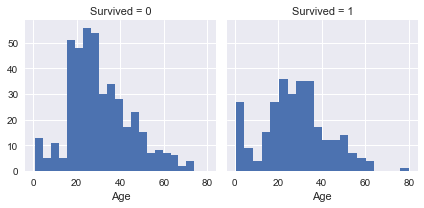

In [13]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# create facet grid with Survived 0 or 1 over 2 columns
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

#### Observations

* all 80+ passengers survived
* most 15-20 passengers did not survived
* Infants (Age <4) had high survival rate
* Most passengers in 15-40 range

We will use Age in our model training

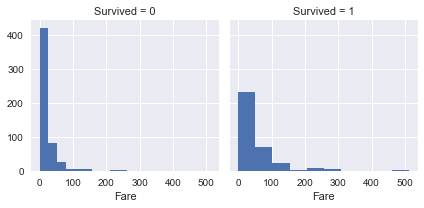

In [14]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Fare', bins=10)

* Most passengers paid between 0 and 100 
* All passengers that paid around 500 survived, but are not many

There doesn't seem to be a strong relationship between Fare and Survived, we do not incude it in our training model

#### Numerical and ordinal features

We check Age with Survived and Pclass

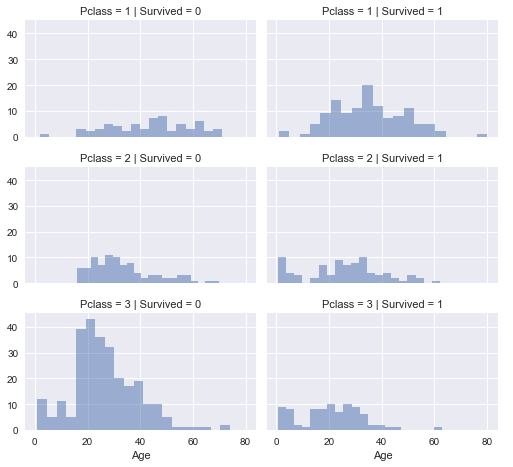

In [15]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

* A lot of passengers in Pclass 3 did not survive
* A lot of passengers in Pclass 1 did survive
* All younger passengers in Pclass 2 survived
* Pclass varies in age distribution

We include Pclass in our model training

#### Categorical features and Survived

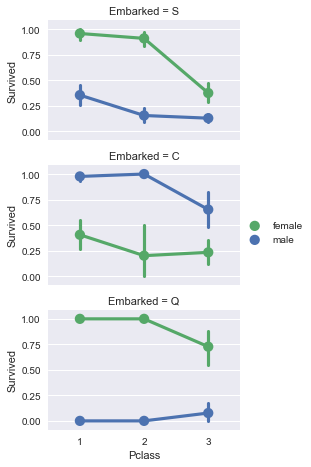

In [16]:
grid = sns.FacetGrid(train_data, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

* Females had a higher survival rate in S and Q, but in C
* Overall females had a higher survival rate

We will complete and include Embarked feature as well in our training model


#### Categorical and numerical features

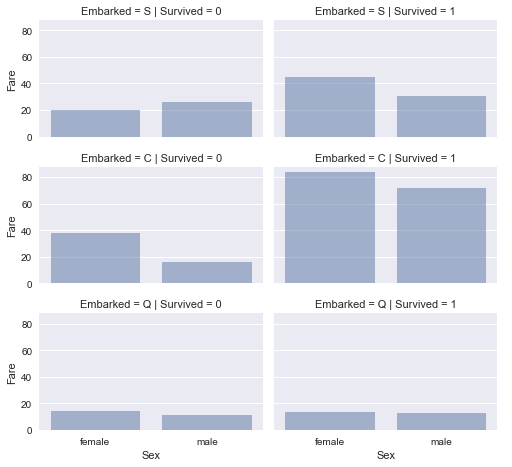

In [17]:
grid = sns.FacetGrid(train_data, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

* Embarked Q didnt have much passengers relatively and female and male were quite equal in survival
* Higher fare paying passengers had better survival. 

consider banding Fare feature

## Wrangle Data

#### Dropping Features

Drop Cabin, Ticket and PassengerID

In [18]:
print("Before", train_data.shape, test_data.shape)

train_data = train_data.drop(['Cabin', 'Ticket','PassengerId'], axis=1)
test_data = test_data.drop(['Cabin', 'Ticket'], axis=1)
combine = [train_data, test_data]

print("After", train_data.shape, test_data.shape)



Before (891, 12) (418, 11)
After (891, 9) (418, 9)


In [19]:
combine[0].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


#### Convert Sex to Numerical

In [20]:
for dataset in combine:
    # select column for Sex, all rows
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)

#### Create new features from existing

We check if we can extract the title from Name and check correlations with Survived


In [21]:
# extract strings with a dot in Name
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


categorize titles: replace uncommon titles with 'Rare' and combine titles with same meaning

In [22]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


* People with master title had a higher survival rate. This is interesting, since all are male
* survival rates varied across different titles

We decide to keep Title in our model training

In [23]:
# turn Title into a numerical/ordinal feature

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1


In [24]:
# Drop name feature

train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

combine=[train_data,test_data]

train_data.head()
test_data.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,Q,1
1,893,3,1,47.0,1,0,7.0000,S,3
2,894,2,0,62.0,0,0,9.6875,Q,1
3,895,3,0,27.0,0,0,8.6625,S,1
4,896,3,1,22.0,1,1,12.2875,S,3


#### Complete Missing Values

Estimate and complete missing values. Begin with Age. We use other correlated features to calculate the Age. We saw earlier that Pclass and Sex correlate with Age. So for every combination of Pclass(1,2,3) and Sex(0,1) we use the median value to calculate Age




In [25]:
# empty 2D array for holding the calculated Age value for every Pclass and Sex combination

cal_ages = np.zeros((2,3))
print(cal_ages)

[[ 0.  0.  0.]
 [ 0.  0.  0.]]


In [26]:
# Iterate over every PClass and Sex combination (total 6 of them) to calculate Age
for dataset in combine:
    # loop through Sex, 0 and 1
    for i in range(0,2):
        # inner loop through Pclass, 0,1,2
        for j in range (0,3):
            # select all rows with Sex[i] and Pclass[j]
            # select Age column only of each row
            # skip it of empty
            # result 1 column of all the ages for this loop of combination PClass and Sex, in cal_df variable
            cal_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
            
            # We calculate the median for this single column containing all the ages
            age_cal = cal_df.median()
            
            
            # Convert this calculated age to nearest 0.5 age and save in our cal_ages array with all the results
            cal_ages[i,j] = int( age_cal/0.5 + 0.5 ) * 0.5
            
    # loop through the dataset fill in missing values Age in combos Sex[i] and Pclass[j]
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j + 1), 'Age' ] = cal_ages[i,j]
            
    dataset['Age'] = dataset['Age'].astype(int)
    
train_data.head()    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


#### create age bands and correlation with survived

In [27]:
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand',ascending=True)


,AgeBand,Survived
0,"(-0.08, 16]",0.550000
1,"(16, 32]",0.337374
2,"(32, 48]",0.412037
3,"(48, 64]",0.434783
4,"(64, 80]",0.090909


In [28]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
    
train_data.head()
    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16, 32]"
1,1,1,1,2,1,0,71.2833,C,3,"(32, 48]"
2,1,3,1,1,0,0,7.9250,S,2,"(16, 32]"
3,1,1,1,2,1,0,53.1000,S,3,"(32, 48]"
4,0,3,0,2,0,0,8.0500,S,1,"(32, 48]"


In [29]:
# drop Ageband now in train_data

train_data = train_data.drop(['AgeBand'], axis=1)
combine = [train_data, test_data]
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### Combine Pclass and SibSP to create 1 feature

In [30]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [31]:
# create a feature isAlone
for dataset in combine:
    # create a column isAlone where all values are 0 initally
    dataset['isAlone'] = 0
    # select all rows where FamilySize is 1, take the isAlone column and set it to 1
    dataset.loc[dataset['FamilySize'] == 1, 'isAlone'] = 1
    
train_data[['isAlone', 'Survived']].groupby(['isAlone'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,isAlone,Survived
0,0,0.505650
1,1,0.303538


In [32]:
train_data = train_data.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)
test_data = test_data.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)
combine = [train_data,test_data]
train_data.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [33]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_data.loc[:,['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Completing categorical feature Embarked

Embarked as 2 missing features, we fill it up with the most frequent port


In [34]:
# select the Embarked column, drop not available ones, find the mode

freq_port = train_data.Embarked.dropna().mode()[0]
freq_port

'S'

In [35]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Converting Embarked to numerical

In [36]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### Completing and converting Fare

Fare has 1 missing value in the test data and we fill it with the mode

In [37]:
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [38]:
# create Fare bands

train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='Survived', ascending=True)

,FareBand,Survived
0,"[0, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31]",0.454955
3,"(31, 512.329]",0.581081


We can see that the higher the fare the higher the survival rate

In [39]:
# convert FareBand to ordinal

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_data = train_data.drop(['FareBand'], axis=1)
combine = [train_data, test_data]
    
train_data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


# Model, Predict and Solve

* We are dealing with a classification and regression problem, where we predict Survived or not Survived from a set of features
* We are also dealing with supervised learning since we have training and a test set

### Split up dependend feature Survived in data sets

In [40]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [41]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

# call logistic regression method
logreg = LogisticRegression()
# fit the independent features and dependent feature
logreg.fit(X_train,Y_train)
# predict Y with X_test using the fitted model
Y_pred = logreg.predict(X_test)
print(Y_pred)
# calculate an accuracy score
acc_log = round(logreg.score(X_train,Y_train) * 100,2)
acc_log

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


80.359999999999999

Calculate the coefficients for the independent features to see if our assumptions about the relationship with survived are correct

In [42]:
# turn all the train_data columns into rows in a new dataframe
# delete the first column which is survived
coeff_df = pd.DataFrame(train_data.columns.delete(0))
# name the columns (only 1 for now) 'Feature'
coeff_df.columns = ['Feature']
# create a new Correlation column and fill it with the logreg.coef_[0]
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])
coeff_df

,Feature,Correlation
0,Pclass,-0.749007
1,Sex,2.201527
2,Age,0.287163
3,Fare,-0.085150
4,Embarked,0.261762
5,Title,0.398234
6,isAlone,0.129140
7,Age*Class,-0.311200


* Gender has the highest correlation with Survived and is positive
* Title, followed by Age and Embarked have a positive correlation with Survived
* Pclass has the highest negative correlation with Survived. AgexClass is good artificial feature because it has the second negative correlation with survived. 

### Support Vector Machines

support vector machines has a higher confidence score than linear regression

In [44]:
# from the sci-kit learn svm library import the SVC and linearSVC libraries
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100,2)
acc_svc

83.840000000000003